In [195]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [196]:
pd.__version__

'0.24.2'

In [197]:
df_train = pd.read_csv('./train.csv')

In [198]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [199]:
df_train['Season_Exp'] = df_train['season'].map(season_dict)

In [200]:
#Extend the df by splitting the datetime into new categories
df_train['year'] = df_train.datetime.apply(lambda x: x.split()[0].split('-')[0])
df_train['month'] = df_train.datetime.apply(lambda x: x.split()[0].split('-')[1])
df_train['day'] = df_train.datetime.apply(lambda x: x.split()[0].split('-')[2])
df_train['hour'] = df_train.datetime.apply(lambda x : x.split()[1].split(":")[0])

#Infer Day Name
sr = pd.to_datetime(df_train['datetime']) 
df_train['Day_name'] = sr.dt.day_name()


#Season List 
season_dict = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_train['Season_Exp'] = df_train['season'].map(season_dict)

#Weather List
weather_dict = {1:'clear' , 2:'mist' , 3:'light_precip' , 4: 'heavy_precip' }
df_train['Weather_Exp'] = df_train['weather'].map(weather_dict)


In [201]:
df_train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Season_Exp,year,month,day,hour,Day_name,Weather_Exp
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,Winter,2012,12,19,19,Wednesday,clear
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,Winter,2012,12,19,20,Wednesday,clear
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,Winter,2012,12,19,21,Wednesday,clear
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,Winter,2012,12,19,22,Wednesday,clear
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,Winter,2012,12,19,23,Wednesday,clear


In [202]:
df_train.isnull().sum() # number of missing values 

datetime       0
season         0
holiday        0
workingday     0
weather        0
temp           0
atemp          0
humidity       0
windspeed      0
casual         0
registered     0
count          0
Season_Exp     0
year           0
month          0
day            0
hour           0
Day_name       0
Weather_Exp    0
dtype: int64

In [203]:
df_train.nunique()

datetime       10886
season             4
holiday            2
workingday         2
weather            4
temp              49
atemp             60
humidity          89
windspeed         28
casual           309
registered       731
count            822
Season_Exp         4
year               2
month             12
day               19
hour              24
Day_name           7
Weather_Exp        4
dtype: int64

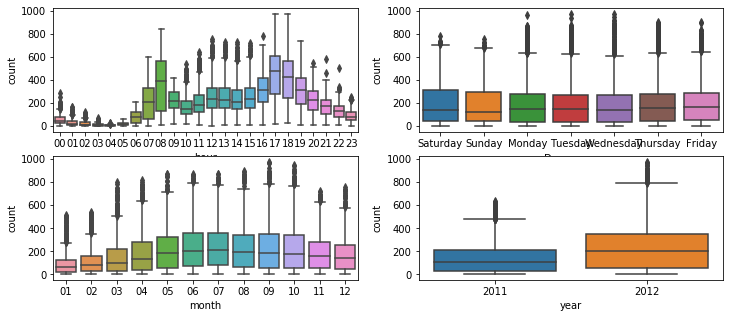

In [216]:
plt.figure(figsize = (12,5))
plt.subplot(2,2,1) # r, c, fignum
sns.boxplot(y = df_train['count'], x = df_train['hour'])
plt.subplot(2,2,2) # r, c, fignum
sns.boxplot(y = df_train['count'], x = df_train['Day_name'])
plt.subplot(2,2,3) # r, c, fignum
sns.boxplot(y = df_train['count'], x = df_train['month'])
plt.subplot(2,2,4) # r, c, fignum
sns.boxplot(y = df_train['count'], x = df_train['year'])

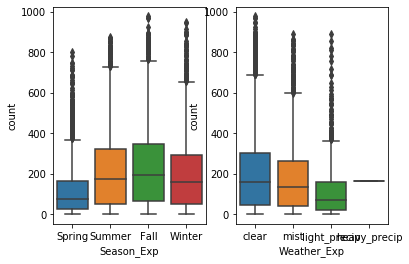

In [208]:
plt.subplot(1,2,1) # r, c, fignum
sns.boxplot(y = df_train['count'], x = df_train['Season_Exp'])
plt.subplot(1,2,2) # r, c, fignum
sns.boxplot(y = df_train['count'], x = df_train['Weather_Exp'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

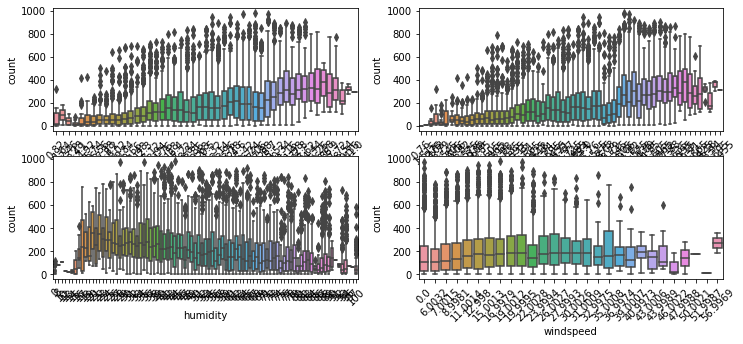

In [209]:
#Others
plt.figure(figsize = (12,5))
plt.subplot(2,2,1) # r, c, fignum
sns.boxplot(y = df_train['count'], x = df_train['temp'])
plt.xticks(rotation = 45)

plt.subplot(2,2,2) # r, c, fignum
sns.boxplot(y = df_train['count'], x = df_train['atemp'])
plt.xticks(rotation = 45)

plt.subplot(2,2,3) # r, c, fignum
sns.boxplot(y = df_train['count'], x = df_train['humidity'])
plt.xticks(rotation = 45)

plt.subplot(2,2,4) # r, c, fignum
sns.boxplot(y = df_train['count'], x = df_train['windspeed'])
plt.xticks(rotation = 45)



In [326]:
df_train.groupby('Season_Exp')['count'].mean().sort_values()# do a ordered as spring - winter - summer - fall (true for median, mean etc)
#originally 1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter' so it'd be 1-3-4-2

Season_Exp
Spring    116.343261
Winter    198.988296
Summer    215.251372
Fall      234.417124
Name: count, dtype: float64

In [327]:
df_train.groupby('Weather_Exp')['count'].mean().sort_values() # do an ordinals of heavy_prep, light_prec, mist, clear
# Original 1:'clear' , 2:'mist' , 3:'light_precip' , 4: 'heavy_precip' 
#Correlate with the original on sum basis

Weather_Exp
light_precip    118.846333
heavy_precip    164.000000
mist            178.955540
clear           205.236791
Name: count, dtype: float64

In [333]:
#df_train.groupby('Day_name')['count'].sum().sort_values() # Sunday - Tue - Wed - Monday - Fri - Thur - Saturday
#df_train.groupby('Day_name')['count'].median().sort_values() # Sunday - Wed - Sat - Monday - Tue - Thu - Fri
#df_train.groupby('Day_name')['count'].mean().sort_values() # Sunday - Wed - Tue - Monday - Sat - Thur - Fri
#df_train.groupby('Day_name')['count'].quantile().sort_values() # Sunday - Tue - Wed - Monday - Fri - Thur - Saturday

Day_name
Sunday       180.839772
Wednesday    188.411348
Tuesday      189.723847
Monday       190.390716
Saturday     196.665404
Thursday     197.296201
Friday       197.844343
Name: count, dtype: float64

In [267]:
df_train.groupby('hour')['count'].sum().sort_values() 

hour
04      2832
03      5091
05      8935
02     10259
01     15372
00     25088
06     34698
23     40816
22     60911
21     79057
10     79667
11     95857
07     96968
09    100910
20    104204
14    111010
15    115960
12    116968
13    117551
19    143767
16    144266
08    165060
18    196472
17    213757
Name: count, dtype: int64

In [331]:
import numpy as np
#Night = 00 - 05
#Morning = 06-09
#Day = 10-16
#Evening =17-23

night = np.sum(df_train.groupby('hour')['count'].mean()[0:5])
morning = np.sum(df_train.groupby('hour')['count'].mean()[6:9])
day = np.sum(df_train.groupby('hour')['count'].mean()[10:16])
evening = np.sum(df_train.groupby('hour')['count'].mean()[17:23])
sorted_timeofday = [night, morning, day, evening]
sorted_timeofday

[130.0617915395711, 652.1450549450549, 1397.8043136687872, 1750.3684210526317]

In [318]:
df_train.groupby('holiday')['count'].sum().sort_values() # TE SUM!

holiday
1      57808
0    2027668
Name: count, dtype: int64

In [322]:
df_train.groupby('workingday')['count'].sum().sort_values() # TE SUM!

workingday
0     654872
1    1430604
Name: count, dtype: int64

Strategy: TE variables in a different way according to their linear correlations